# FAMD with plotnine

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

In [2]:
import os
import pandas as pd
os.chdir("d:/Bureau/PythonProject/packages/scientisttools/data/")
# Chargement des données
D = pd.read_excel("Tennis_Players_AFDM.xlsx",index_col=0)
display(D)

,Taille,Lateralite,MainsRevers,Titres,Finales,TitresGC,RolandGarros,BestClassDouble
Joueur,,,,,,,,
Agassi,180,droitier,deux,60,30,8,vainqueur,123
Becker,191,droitier,une,49,28,6,demi,6
Borg,180,droitier,deux,64,25,11,vainqueur,890
Connors,178,gaucher,deux,109,52,8,demi,370
Courier,185,droitier,deux,23,13,4,vainqueur,20
Edberg,187,droitier,une,41,36,6,finale,1
Kafelnikov,190,droitier,deux,26,20,2,vainqueur,4
Kuerten,190,droitier,une,20,9,3,vainqueur,38
Lendl,187,droitier,une,94,50,8,vainqueur,20


In [31]:
x = [9]
isinstance(x,list)

True

In [3]:
from scientisttools.decomposition import FAMD
#instaciation
afdm = FAMD(n_components = None,
            row_labels=list(D.index[:16]), #jusqu'à Wilander
            row_sup_labels=list(D.index[16:]), #à partir de Djokovic
            quanti_labels=['Taille','Titres','Finales','TitresGC'],
            quanti_sup_labels=['BestClassDouble'],
            quali_labels=['Lateralite','MainsRevers'],
            quali_sup_labels=['RolandGarros'],
            parallelize=False).fit(D)

## Scree plot

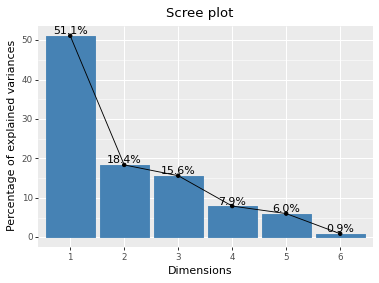

In [4]:
# scree plot
from scientisttools.ggplot import fviz_screeplot
p = fviz_screeplot(afdm,choice="proportion",add_labels=True)
print(p)

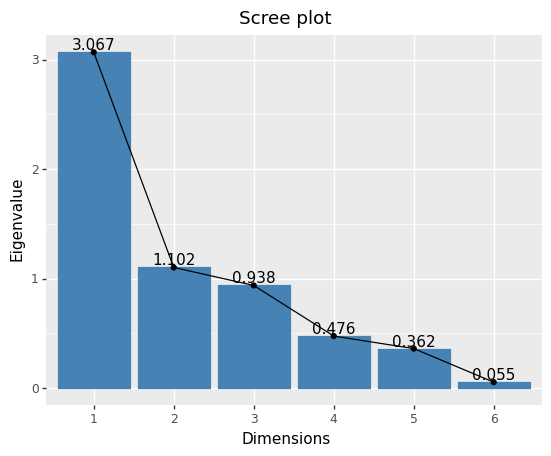

In [5]:
# Eigenvalue plot
p = fviz_screeplot(afdm,choice="eigenvalue",add_labels=True)
print(p)

## Individuals Factor Map - FAMD

### color

#### Color with css color

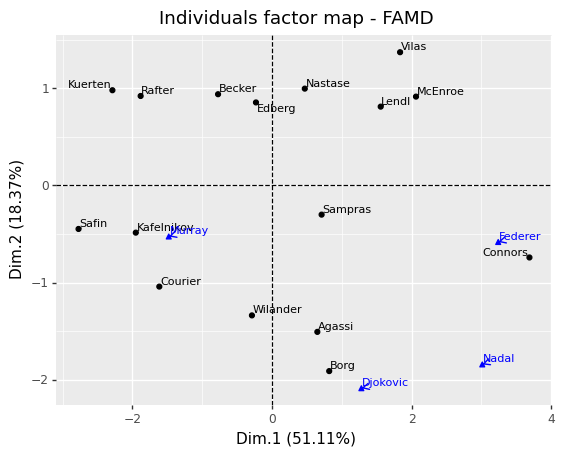

In [6]:
from scientisttools.ggplot import fviz_famd_ind
p = fviz_famd_ind(afdm,repel=True)
print(p)

#### Color using cos2

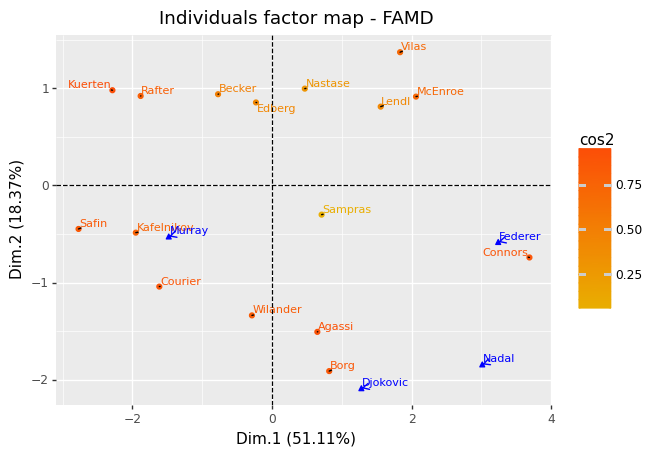

In [7]:
# Color using cos2
p = fviz_famd_ind(afdm,color="cos2",repel=True)
print(p)

#### Color using contrib

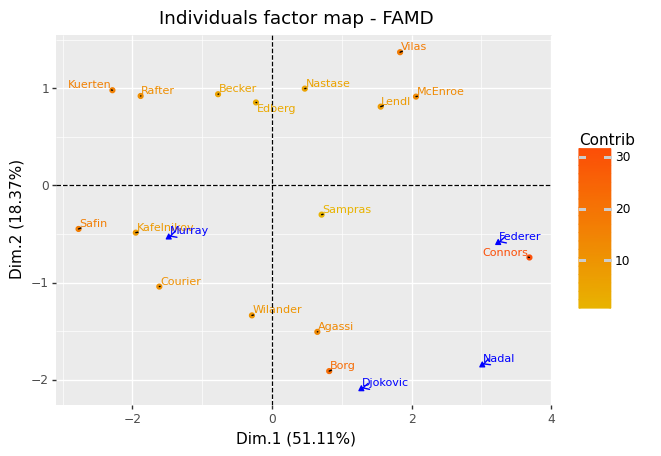

In [8]:
# Color using contrib
p = fviz_famd_ind(afdm,color="contrib",repel=True)
print(p)

#### Color using numpy array

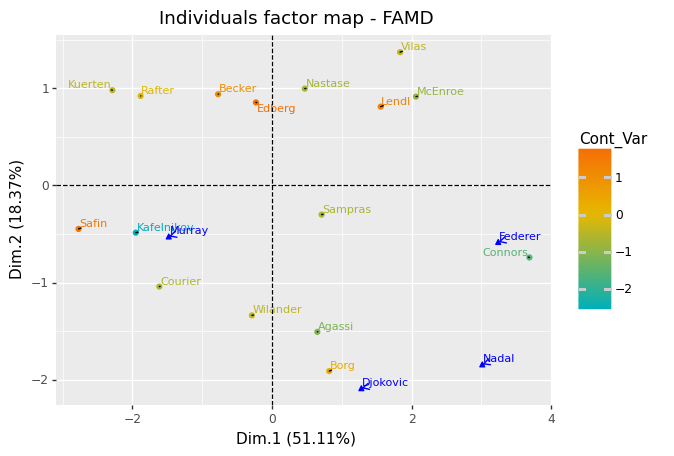

In [9]:
# Using  numpy color
import numpy as np
np.random.seed(123)
color_numpy = np.random.normal(size=16)
p = fviz_famd_ind(afdm,color=color_numpy,repel=True)
print(p)

#### Color using cluster

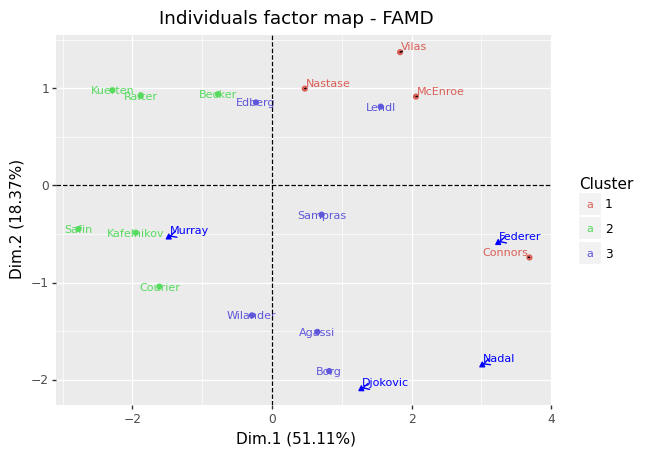

In [10]:
# Using KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,random_state=np.random.seed(123), n_init="auto").fit(afdm.row_coord_)
p = fviz_famd_ind(afdm,color=kmeans,repel=True)
print(p)

### Color using continuous variables

#### Color using active continuous variables

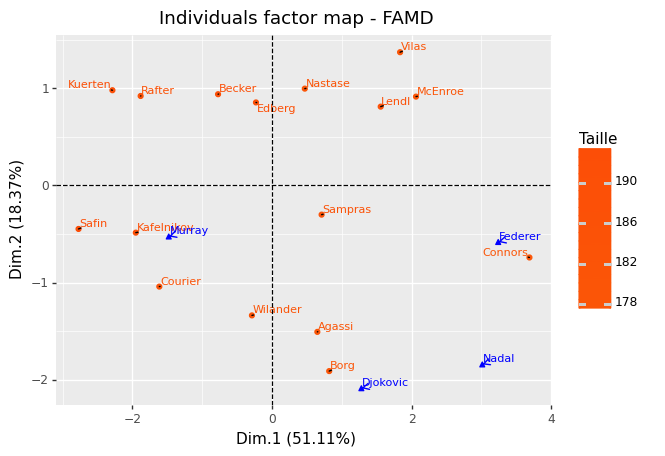

In [11]:
# Using active continous variables
p = fviz_famd_ind(afdm,color="Taille",repel=True)
print(p)

#### Color using supplementary continuous variables

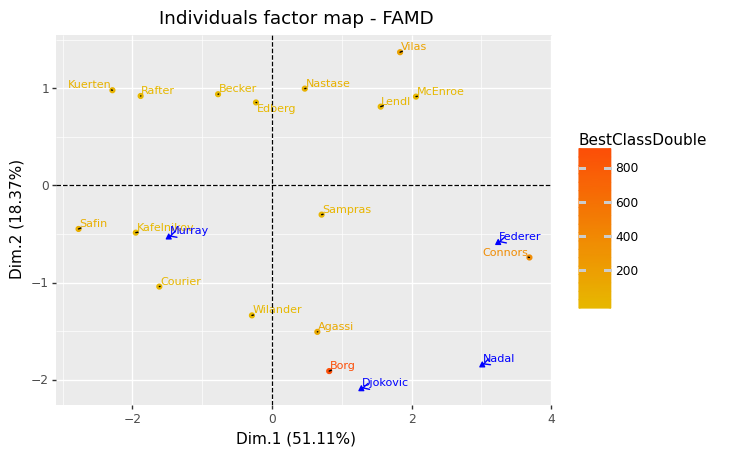

In [12]:
# Using supplementary continous variables
p = fviz_famd_ind(afdm,color="BestClassDouble",repel=True)
print(p)

### Habillage

#### Habillage using active variables/categories

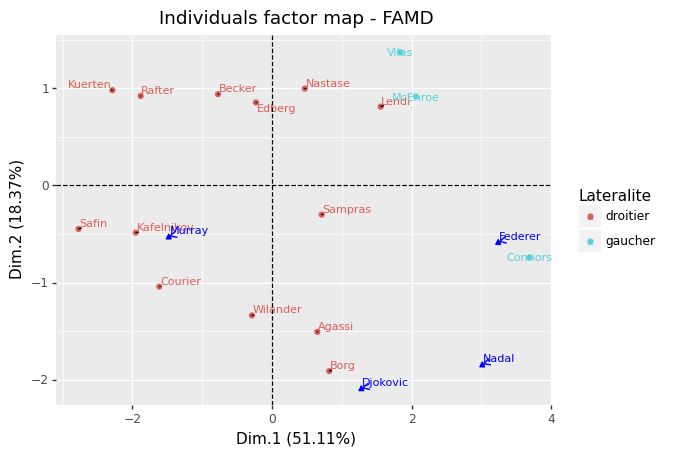

In [13]:
# Using active categories
p = fviz_famd_ind(afdm,habillage="Lateralite",repel=True)
print(p)

#### Habillage using supplementary variables/categories

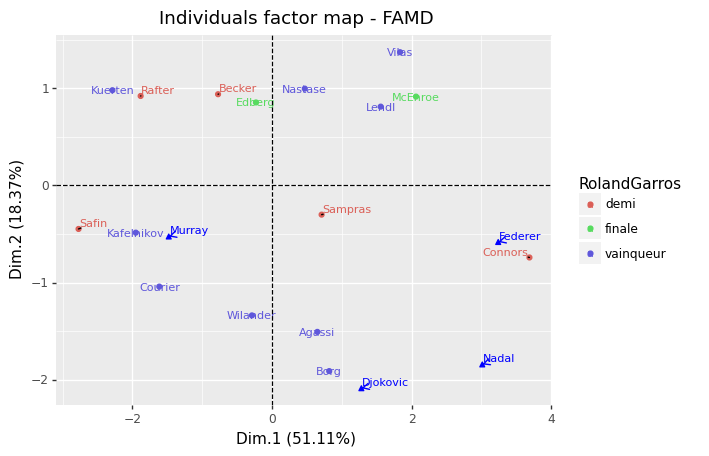

In [14]:
# Using supplementary categories
p = fviz_famd_ind(afdm,habillage="RolandGarros",repel=True)
print(p)

## Continuous variables Factor Map - FAMD

### Color using css color

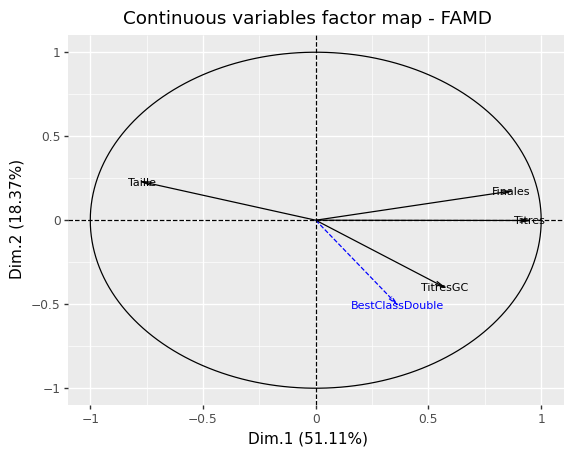

In [15]:
from scientisttools.ggplot import fviz_famd_col
p = fviz_famd_col(afdm)
print(p)

### Color using cos2

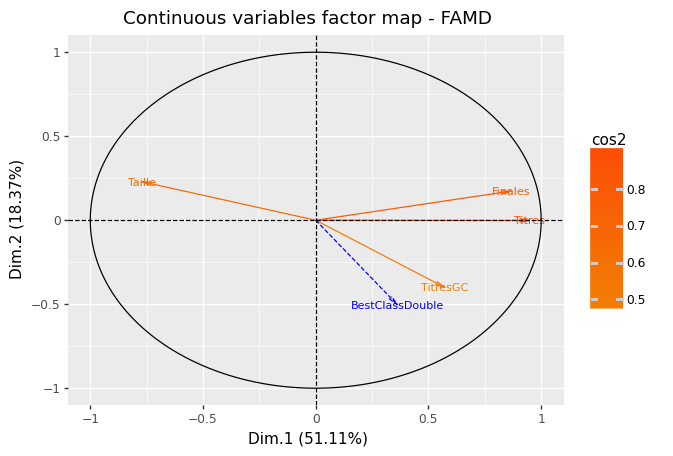

In [16]:
# Color using cos2
p = fviz_famd_col(afdm,color="cos2")
print(p)

### Color using contrib

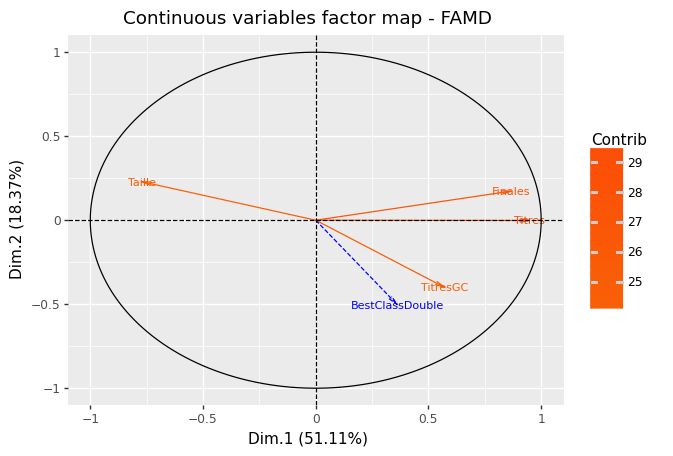

In [17]:
# Color using contrib
p = fviz_famd_col(afdm,color="contrib")
print(p)

### Color using numpy array

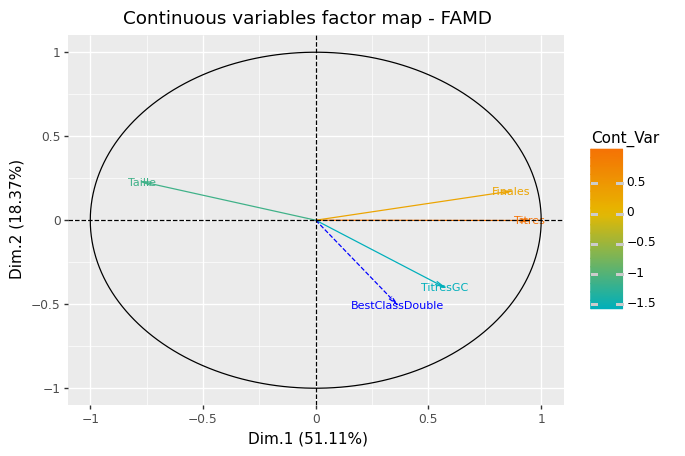

In [18]:
# Color using numpy array
np.random.seed(123)
color_numpy = np.random.normal(size=4)
p = fviz_famd_col(afdm,color=color_numpy)
print(p)

### Color using cluster

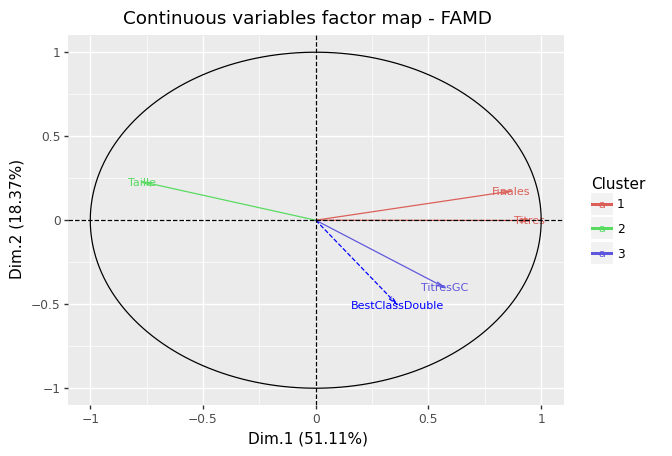

In [19]:
# Color using KMeans
kmeans = KMeans(n_clusters=3,random_state=np.random.seed(123), n_init="auto").fit(afdm.col_coord_)
p = fviz_famd_col(afdm,color=kmeans)
print(p)

## Variables/categories Factor Map - FAMD

### Color using css color

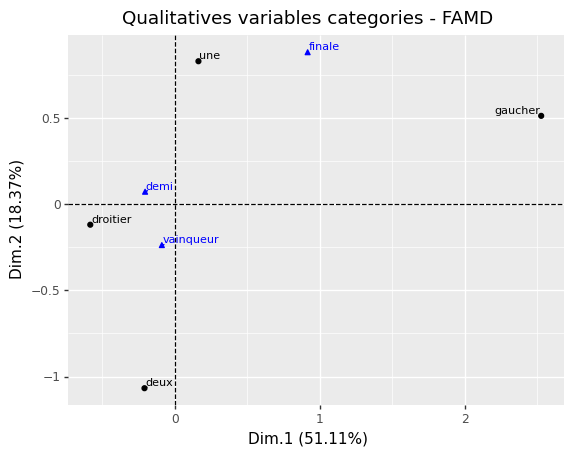

In [20]:
# using css color
from scientisttools.ggplot import fviz_famd_mod
p = fviz_famd_mod(afdm,repel=True)
print(p)

### Color using cos2

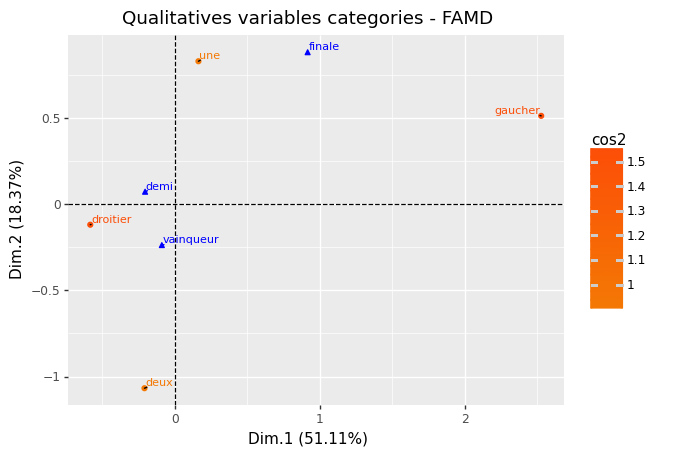

In [21]:
# Color using cos2
p = fviz_famd_mod(afdm,color="cos2",repel=True)
print(p)

### Color using contrib

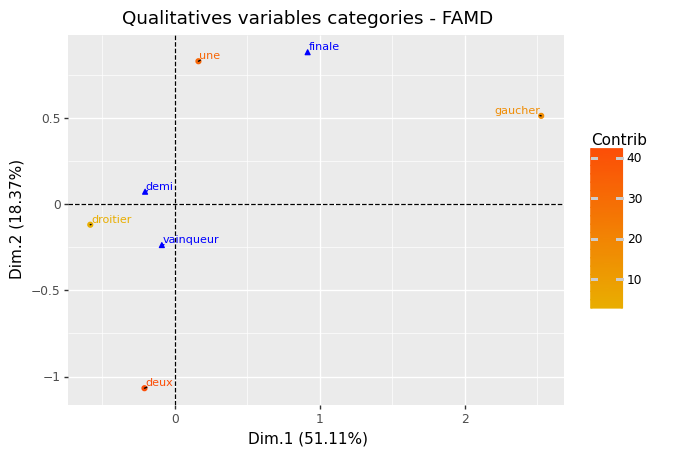

In [22]:
# Using contrib
p = fviz_famd_mod(afdm,color="contrib",repel=True)
print(p)

### Color using numpy array

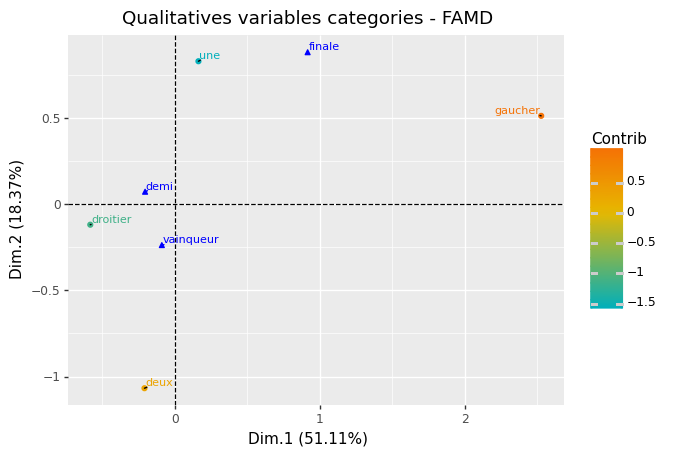

In [23]:
# Color using numpy array
np.random.seed(123)
color_numpy = np.random.normal(size=len(afdm.mod_labels_))
p = fviz_famd_mod(afdm,color=color_numpy,repel=True)
print(p)

### Color using cluster

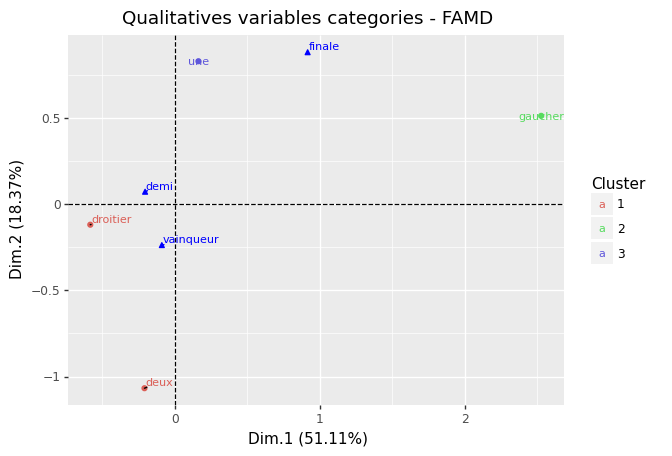

In [24]:
# Color using KMeans
kmeans = KMeans(n_clusters=3,random_state=np.random.seed(123), n_init="auto").fit(afdm.mod_coord_)
p = fviz_famd_mod(afdm,color=kmeans,repel=True)
print(p)

## Variables graphs - FAMD

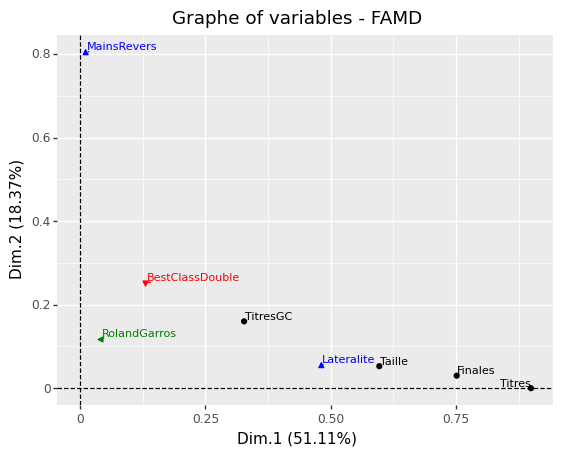

In [25]:
# variables graphs
from scientisttools.ggplot import fviz_famd_var
p = fviz_famd_var(afdm,repel=True)
print(p)

## fviz_famd

### Individuals Factor Map

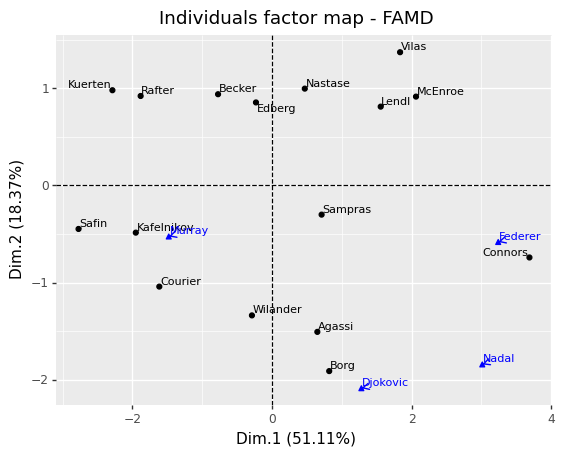

In [26]:
# Individuals Factor Map
from scientisttools.ggplot import fviz_famd
p = fviz_famd(afdm,choice="ind",repel=True)
print(p)

### Quantitatives variables

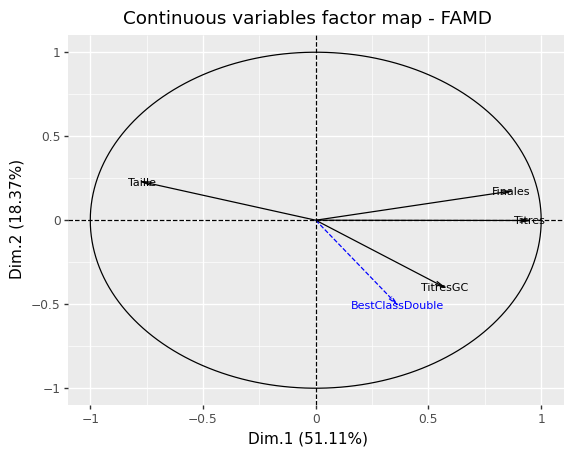

In [27]:
# Quantitatives variables factor map - FAMD
p = fviz_famd(afdm,choice="col")
print(p)

### Categorical variables

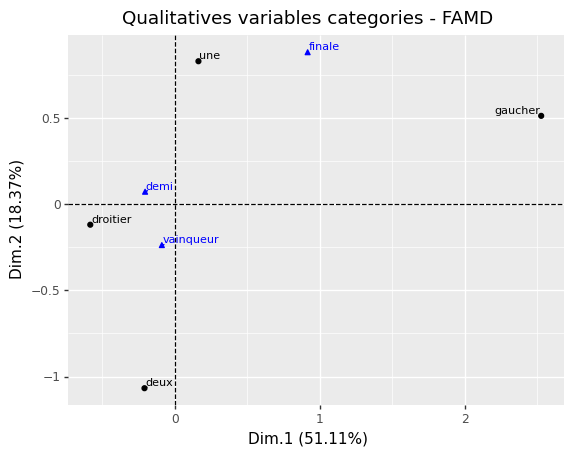

In [28]:
# using categorical variables
p = fviz_famd(afdm,choice="mod",repel=True)
print(p)